# Explore data

## 1. Import data

In [157]:
# import packages
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
lemmatizer = nltk.stem.WordNetLemmatizer()

In [158]:
# import data
df = pd.read_csv("data.csv", sep = ";")

In [159]:
df.head()

,title,description,image,url
0,Israël 65 jaar geliefd en gehaat,"Israël, door de één geliefd en door de ander g...",https://images.npo.nl/header/2560x1440/195586.jpg,npo://www.npostart.nl/israel-65-jaar-geliefd-e...
1,Denkend aan Showroom,Herinneringen aan de kleurrijke mensen uit het...,https://images.npo.nl/header/2560x1440/1373060...,npo://www.npostart.nl/denkend-aan-showroom/KN_...
2,Onder de radar: Speciale Eenheden in actie,Jessica Villerius rijdt mee met de Dienst Spec...,https://images.npo.nl/header/2560x1440/736390.jpg,npo://www.npostart.nl/onder-de-radar-speciale-...
3,Once Upon a Time in Iraq,Vanuit meerdere perspectieven worden de persoo...,https://images.npo.nl/header/2560x1440/Once_Up...,npo://www.npostart.nl/once-upon-a-time-in-iraq...
4,Teenage Boss,NPO Zapp programma waarin tieners de baas word...,https://images.npo.nl/header/2560x1440/teenage...,npo://www.npostart.nl/teenage-boss/BV_101404187


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2854 non-null   object
 1   description  2728 non-null   object
 2   image        2816 non-null   object
 3   url          2854 non-null   object
dtypes: object(4)
memory usage: 89.4+ KB


In [161]:
# filter specific part from url
df['url'] = df['url'].str.replace('npo://', 'https://')

In [162]:
df['TitleDescription'] = df['title'] + ' ' + df['description']
df.head()

,title,description,image,url,TitleDescription
0,Israël 65 jaar geliefd en gehaat,"Israël, door de één geliefd en door de ander g...",https://images.npo.nl/header/2560x1440/195586.jpg,https://www.npostart.nl/israel-65-jaar-geliefd...,"Israël 65 jaar geliefd en gehaat Israël, door..."
1,Denkend aan Showroom,Herinneringen aan de kleurrijke mensen uit het...,https://images.npo.nl/header/2560x1440/1373060...,https://www.npostart.nl/denkend-aan-showroom/K...,Denkend aan Showroom Herinneringen aan de kle...
2,Onder de radar: Speciale Eenheden in actie,Jessica Villerius rijdt mee met de Dienst Spec...,https://images.npo.nl/header/2560x1440/736390.jpg,https://www.npostart.nl/onder-de-radar-special...,Onder de radar: Speciale Eenheden in actie Je...
3,Once Upon a Time in Iraq,Vanuit meerdere perspectieven worden de persoo...,https://images.npo.nl/header/2560x1440/Once_Up...,https://www.npostart.nl/once-upon-a-time-in-ir...,Once Upon a Time in Iraq Vanuit meerdere pers...
4,Teenage Boss,NPO Zapp programma waarin tieners de baas word...,https://images.npo.nl/header/2560x1440/teenage...,https://www.npostart.nl/teenage-boss/BV_101404187,Teenage Boss NPO Zapp programma waarin tiener...


## 2. TF-IDF

In [163]:
import string 

def preprocess(text):
    return text.translate(str.maketrans('', '', string.punctuation))


def clean_text(x, stop_words):
  if pd.isna(x) == False:
    x = x.lower()
    x = x.translate(str.maketrans(' ', ' ', string.punctuation))
    x = x.strip()

    x = nltk.word_tokenize(x)
    x = [token for token in x if not token in stop_words]
    x = ' '.join([lemmatizer.lemmatize(w) for w in x])
  else:
    x = ''

  return x

In [164]:
stop_words = stopwords.words('dutch')
df['Text'] = df['TitleDescription'].apply(lambda x: clean_text(x, stop_words))

In [165]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.9, norm='l2')
X = vectorizer.fit_transform(df['Text'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())
tf_idf

/Users/quinten/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1000,10000,11,11000,12,1200,125,13,...,zwitserse,zwolle,zélf,álle,écht,échte,én,één,özcan,überhaupt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.197221,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.159694,0.0,0.094982,0.0,0.0
2852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


## kmeans

In [166]:
clusters = 15
kmeanModel = KMeans(n_clusters=clusters, init='k-means++', max_iter=3000, random_state=0)
mod = kmeanModel.fit_transform(tf_idf)
df['k_means'] = kmeanModel.predict(tf_idf)

In [167]:
def plot(user_ratings, k):

        h = 0.2
        reduced_data = PCA(n_components=2).fit_transform(user_ratings)

        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit(reduced_data)

        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        plt.figure(1)
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = kmeans.cluster_centers_
        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='r', zorder=10)
        plt.title('K-means clustering of the user')

/Users/quinten/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


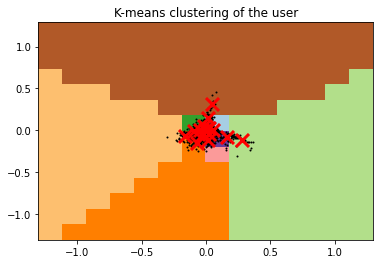

In [168]:
from scipy.sparse import dok_matrix

d_matrix = dok_matrix(tf_idf).todense()

plot(user_ratings=d_matrix, k=15)

In [169]:
order_centroids = kmeanModel.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
dict = []
for i in range(clusters):
  print('%d' % i, sep='', end=', '),
  for ind in order_centroids[i, :20]:
    print(terms[ind], sep='', end=', ')
  print('')

0, max, gouden, missie, nacht, amsterdam, zweedse, kunstenaar, mee, maakt, hele, the, new, rotterdam, vanuit, pad, kind, gaat, portret, iedereen, land, 
1, we, volgen, zien, filemon, leven, onze, nederland, gaan, land, tijd, zoek, mensen, maken, vinden, laten, jaar, houden, liefde, elkaar, kleine, 
2, mensen, leven, nieuwe, alle, gaat, programma, waarin, the, zien, maken, gaan, waar, onderzoekt, verschillende, tussen, komen, bijzondere, den, verhalen, cabaretregistraties, 
3, muziek, lang, muzikale, show, drie, jaar, strijd, één, gaan, waar, klas, gevolgd, jonge, elkaar, programma, leven, kerst, week, bekende, waarin, 
4, verleden, nederlanders, toekomst, achter, israël, laten, leven, dood, verjaardag, jaar, kwam, waarom, gaan, bekende, jonge, vlak, ander, ter, welkom, eeuw, 
5, no, verslag, koning, voetbal, ek, koningin, willemalexander, laatste, sport, journaal, jaar, vandaag, nieuws, máxima, vrijheid, opening, belangrijkste, beatrix, programma, diverse, 
6, wereld, hele, mensen, ter

/Users/quinten/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [170]:
df[df['k_means'] == 2]['title'].head(20)

1                           Denkend aan Showroom 
2     Onder de radar: Speciale Eenheden in actie 
4                                   Teenage Boss 
5                                        In Blue 
6                            Zappbaas voor 1 dag 
7                    Het Groot-Brittannië van... 
9                              9/11 A love story 
11                           Wereldjongerendagen 
14                                  Rauw Curaçao 
15                                      In Beeld 
16                          Rekenen met Schooltv 
23                         Strictly come dancing 
25                    Rechtsscholen van de islam 
33                                Villa Victoria 
34                                  Jochem Myjer 
35                                    Kunstlicht 
36                  The trial of Christine Keeler
40                         Dialoog met de natuur 
42             De aankomst van de vlag van D-Day 
43                            Hoe overleef ik... 


Save to csv|

In [171]:
df[['title', 'description', 'image', 'url', 'k_means']].to_csv('recommendations/df.csv')

In [172]:
df = pd.read_csv("./recommendations/df.csv")
df

,Unnamed: 0,title,description,image,url,k_means
0,0,Israël 65 jaar geliefd en gehaat,"Israël, door de één geliefd en door de ander g...",https://images.npo.nl/header/2560x1440/195586.jpg,https://www.npostart.nl/israel-65-jaar-geliefd...,4
1,1,Denkend aan Showroom,Herinneringen aan de kleurrijke mensen uit het...,https://images.npo.nl/header/2560x1440/1373060...,https://www.npostart.nl/denkend-aan-showroom/K...,2
2,2,Onder de radar: Speciale Eenheden in actie,Jessica Villerius rijdt mee met de Dienst Spec...,https://images.npo.nl/header/2560x1440/736390.jpg,https://www.npostart.nl/onder-de-radar-special...,2
3,3,Once Upon a Time in Iraq,Vanuit meerdere perspectieven worden de persoo...,https://images.npo.nl/header/2560x1440/Once_Up...,https://www.npostart.nl/once-upon-a-time-in-ir...,13
4,4,Teenage Boss,NPO Zapp programma waarin tieners de baas word...,https://images.npo.nl/header/2560x1440/teenage...,https://www.npostart.nl/teenage-boss/BV_101404187,2
...,...,...,...,...,...,...
2851,2851,Onder Wibi's vleugels,Meesterpianist Wibi Soerjadi neemt zes bijzond...,https://images.poms.omroep.nl/image/s2560/c256...,https://www.npostart.nl/onder-wibis-vleugels/P...,10
2852,2852,Theatershow Jandino,Theaterprogramma.,https://images.npo.nl/header/2560x1440/555654.jpg,https://www.npostart.nl/theatershow-jandino/PO...,2
2853,2853,Onze Vaders,NaN,https://images.npo.nl/header/2560x1440/88360.jpg,https://www.npostart.nl/onze-vaders/POMS_S_IKO...,2
2854,2854,Grenslanders,In de afgelegen grensstreek tussen Nederland e...,https://images.npo.nl/header/2560x1440/Grensla...,https://www.npostart.nl/grenslanders/AT_2085910,7


In [173]:
df=df.rename(columns = {'Unnamed: 0':'index'})
df

,index,title,description,image,url,k_means
0,0,Israël 65 jaar geliefd en gehaat,"Israël, door de één geliefd en door de ander g...",https://images.npo.nl/header/2560x1440/195586.jpg,https://www.npostart.nl/israel-65-jaar-geliefd...,4
1,1,Denkend aan Showroom,Herinneringen aan de kleurrijke mensen uit het...,https://images.npo.nl/header/2560x1440/1373060...,https://www.npostart.nl/denkend-aan-showroom/K...,2
2,2,Onder de radar: Speciale Eenheden in actie,Jessica Villerius rijdt mee met de Dienst Spec...,https://images.npo.nl/header/2560x1440/736390.jpg,https://www.npostart.nl/onder-de-radar-special...,2
3,3,Once Upon a Time in Iraq,Vanuit meerdere perspectieven worden de persoo...,https://images.npo.nl/header/2560x1440/Once_Up...,https://www.npostart.nl/once-upon-a-time-in-ir...,13
4,4,Teenage Boss,NPO Zapp programma waarin tieners de baas word...,https://images.npo.nl/header/2560x1440/teenage...,https://www.npostart.nl/teenage-boss/BV_101404187,2
...,...,...,...,...,...,...
2851,2851,Onder Wibi's vleugels,Meesterpianist Wibi Soerjadi neemt zes bijzond...,https://images.poms.omroep.nl/image/s2560/c256...,https://www.npostart.nl/onder-wibis-vleugels/P...,10
2852,2852,Theatershow Jandino,Theaterprogramma.,https://images.npo.nl/header/2560x1440/555654.jpg,https://www.npostart.nl/theatershow-jandino/PO...,2
2853,2853,Onze Vaders,NaN,https://images.npo.nl/header/2560x1440/88360.jpg,https://www.npostart.nl/onze-vaders/POMS_S_IKO...,2
2854,2854,Grenslanders,In de afgelegen grensstreek tussen Nederland e...,https://images.npo.nl/header/2560x1440/Grensla...,https://www.npostart.nl/grenslanders/AT_2085910,7


In [174]:
df.to_csv('recommendations/df.csv')

End

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        2856 non-null   int64 
 1   title        2854 non-null   object
 2   description  2728 non-null   object
 3   image        2816 non-null   object
 4   url          2854 non-null   object
 5   k_means      2856 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 134.0+ KB


In [135]:
df.url

0       www.npostart.nl/israel-65-jaar-geliefd-en-geha...
1         www.npostart.nl/denkend-aan-showroom/KN_1713810
2       www.npostart.nl/onder-de-radar-speciale-eenhed...
3       www.npostart.nl/once-upon-a-time-in-iraq/VPWON...
4               www.npostart.nl/teenage-boss/BV_101404187
                              ...                        
2851    www.npostart.nl/onder-wibis-vleugels/POMS_S_AV...
2852    www.npostart.nl/theatershow-jandino/POMS_S_NTR...
2853      www.npostart.nl/onze-vaders/POMS_S_IKON_3839326
2854              www.npostart.nl/grenslanders/AT_2085910
2855        www.npostart.nl/niks-te-gek/POMS_S_NTR_124296
Name: url, Length: 2856, dtype: object

In [55]:
df = pd.read_csv("./recommendations/df.csv")

In [56]:
df

,Unnamed: 0,index,title,description,image,k_means
0,0,0,Israël 65 jaar geliefd en gehaat,"Israël, door de één geliefd en door de ander g...",https://images.npo.nl/header/2560x1440/195586.jpg,4
1,1,1,Denkend aan Showroom,Herinneringen aan de kleurrijke mensen uit het...,https://images.npo.nl/header/2560x1440/1373060...,2
2,2,2,Onder de radar: Speciale Eenheden in actie,Jessica Villerius rijdt mee met de Dienst Spec...,https://images.npo.nl/header/2560x1440/736390.jpg,2
3,3,3,Once Upon a Time in Iraq,Vanuit meerdere perspectieven worden de persoo...,https://images.npo.nl/header/2560x1440/Once_Up...,13
4,4,4,Teenage Boss,NPO Zapp programma waarin tieners de baas word...,https://images.npo.nl/header/2560x1440/teenage...,2
...,...,...,...,...,...,...
2851,2851,2851,Onder Wibi's vleugels,Meesterpianist Wibi Soerjadi neemt zes bijzond...,https://images.poms.omroep.nl/image/s2560/c256...,10
2852,2852,2852,Theatershow Jandino,Theaterprogramma.,https://images.npo.nl/header/2560x1440/555654.jpg,2
2853,2853,2853,Onze Vaders,NaN,https://images.npo.nl/header/2560x1440/88360.jpg,2
2854,2854,2854,Grenslanders,In de afgelegen grensstreek tussen Nederland e...,https://images.npo.nl/header/2560x1440/Grensla...,7


In [57]:
df = pd.read_csv("./recommendations/df.csv", sep = ",")
df

,Unnamed: 0,index,title,description,image,k_means
0,0,0,Israël 65 jaar geliefd en gehaat,"Israël, door de één geliefd en door de ander g...",https://images.npo.nl/header/2560x1440/195586.jpg,4
1,1,1,Denkend aan Showroom,Herinneringen aan de kleurrijke mensen uit het...,https://images.npo.nl/header/2560x1440/1373060...,2
2,2,2,Onder de radar: Speciale Eenheden in actie,Jessica Villerius rijdt mee met de Dienst Spec...,https://images.npo.nl/header/2560x1440/736390.jpg,2
3,3,3,Once Upon a Time in Iraq,Vanuit meerdere perspectieven worden de persoo...,https://images.npo.nl/header/2560x1440/Once_Up...,13
4,4,4,Teenage Boss,NPO Zapp programma waarin tieners de baas word...,https://images.npo.nl/header/2560x1440/teenage...,2
...,...,...,...,...,...,...
2851,2851,2851,Onder Wibi's vleugels,Meesterpianist Wibi Soerjadi neemt zes bijzond...,https://images.poms.omroep.nl/image/s2560/c256...,10
2852,2852,2852,Theatershow Jandino,Theaterprogramma.,https://images.npo.nl/header/2560x1440/555654.jpg,2
2853,2853,2853,Onze Vaders,NaN,https://images.npo.nl/header/2560x1440/88360.jpg,2
2854,2854,2854,Grenslanders,In de afgelegen grensstreek tussen Nederland e...,https://images.npo.nl/header/2560x1440/Grensla...,7


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2856 non-null   int64 
 1   index        2856 non-null   int64 
 2   title        2854 non-null   object
 3   description  2728 non-null   object
 4   image        2816 non-null   object
 5   k_means      2856 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 134.0+ KB


In [59]:
df["image"].loc[0]

'https://images.npo.nl/header/2560x1440/195586.jpg'

In [60]:
df

,Unnamed: 0,index,title,description,image,k_means
0,0,0,Israël 65 jaar geliefd en gehaat,"Israël, door de één geliefd en door de ander g...",https://images.npo.nl/header/2560x1440/195586.jpg,4
1,1,1,Denkend aan Showroom,Herinneringen aan de kleurrijke mensen uit het...,https://images.npo.nl/header/2560x1440/1373060...,2
2,2,2,Onder de radar: Speciale Eenheden in actie,Jessica Villerius rijdt mee met de Dienst Spec...,https://images.npo.nl/header/2560x1440/736390.jpg,2
3,3,3,Once Upon a Time in Iraq,Vanuit meerdere perspectieven worden de persoo...,https://images.npo.nl/header/2560x1440/Once_Up...,13
4,4,4,Teenage Boss,NPO Zapp programma waarin tieners de baas word...,https://images.npo.nl/header/2560x1440/teenage...,2
...,...,...,...,...,...,...
2851,2851,2851,Onder Wibi's vleugels,Meesterpianist Wibi Soerjadi neemt zes bijzond...,https://images.poms.omroep.nl/image/s2560/c256...,10
2852,2852,2852,Theatershow Jandino,Theaterprogramma.,https://images.npo.nl/header/2560x1440/555654.jpg,2
2853,2853,2853,Onze Vaders,NaN,https://images.npo.nl/header/2560x1440/88360.jpg,2
2854,2854,2854,Grenslanders,In de afgelegen grensstreek tussen Nederland e...,https://images.npo.nl/header/2560x1440/Grensla...,7


In [61]:
import string
df[df['title'].str.contains("Zondag", na = False)]

,Unnamed: 0,index,title,description,image,k_means
872,872,872,Zapplive op Zondag,Lekker loom wakker worden met Zapplive op Zond...,https://images.npo.nl/header/2560x1440/Zappliv...,0
1357,1357,1357,WNL Op Zondag,Rechts georiënteerde ochtendshow. Volgens vast...,https://images.npo.nl/header/2560x1440/Poster_...,11
2205,2205,2205,Nederland Zingt op Zondag,Koor- en samenzang vanuit verschillende kerken...,https://images.npo.nl/header/2560x1440/Nederla...,12
2800,2800,2800,Zondag met Lubach,"Zeven dagen nieuws in dertig minuten, satirisc...",https://images.npo.nl/header/2560x1440/MD-Zond...,2


In [83]:
v = df.groupby(['k_means']).size()
v

k_means
0     182
1     117
2     949
3     165
4     106
5      82
6     139
7     125
8      60
9     149
10    215
11    125
12    224
13    141
14     77
dtype: int64

In [89]:
1 - sum(v*(v-1))/(N*(N-1))

0.8542625106084465

In [84]:
print(np.var(v))

43159.97333333335


In [87]:
N = len(df)

In [63]:
def diversity(df):

    # calculate variety of data
    v = df.groupby(['k_means']).size()

    # calculate disparity of units
    

    # calculate balance
    b = np.var(v)

    # calculate diversity
    diversity = v + b

In [98]:
def diversity(df, categories):
    # select random number of categories of df
    randomlist = random.sample(range(0, 15), categories)

    # filter based on random numbers
    df = df[df['k_means'].isin(randomlist)]

    # calculate samples per categorie (variety)
    v = df.groupby(['k_means']).size()

    # total content (actually amount of rows)
    N = len(df)

    # calculate diversity
    diversity = (1 - sum(v*(v-1))/(N*(N-1)))

    # return diversity
    return diversity
    

In [100]:
diversity(df, 5)

0.7874009347693558

In [97]:
import random
randomlist = random.sample(range(0, 15), 15)
randomlist

[12, 14, 1, 3, 8, 0, 9, 13, 5, 7, 10, 2, 4, 6, 11]

In [93]:
df[df['k_means'].isin(randomlist)]

,index,title,description,image,k_means
12,12,True Selfie,Acht jongeren met psychische problemen filmen ...,https://images.npo.nl/header/2560x1440/1035498...,14
17,17,Juliana,De dramaserie Juliana neemt de kijker mee naar...,https://images.npo.nl/header/2560x1440/Juliana...,7
26,26,Kinderen van de rekening,"Serie portretten van jongeren in de jeugdzorg,...",https://images.npo.nl/header/2560x1440/124287.jpg,14
27,27,NOS Holocaust Herdenking,In Nederland wordt elke laatste zondag van jan...,https://images.npo.nl/header/2560x1440/SL_Nati...,7
29,29,Close Up,"De mooiste documentaires over architectuur, fi...",https://images.npo.nl/header/2560x1440/ident_c...,7
...,...,...,...,...,...
2842,2842,NOS Studio Sport Eredivisie,Met samenvattingen van de Eredivisieduels.,https://images.npo.nl/header/2560x1440/Studio_...,5
2843,2843,Het verhaal van...,Het leven van een muzikale Nederlander wordt u...,https://images.npo.nl/header/2560x1440/hazes_c...,3
2846,2846,R.U.B.E.N.,"Quiz vermomd als talkshow, dat is R.U.B.E.N., ...",https://images.npo.nl/header/2560x1440/245686.jpg,3
2848,2848,De Ouders van...,We praten met ouders van Bekende Nederlanders ...,https://images.npo.nl/header/2560x1440/605331.jpg,14


In [101]:
def diversity(df, categories):
    # select random number of categories of df
    randomlist = random.sample(range(0, 15), categories)

    # filter based on random numbers
    df = df[df['k_means'].isin(randomlist)]

    # calculate samples per categorie (variety)
    v = df.groupby(['k_means']).size()

    # total content (actually amount of rows)
    N = len(df)

    # calculate diversity
    diversity_index = (1 - sum(v*(v-1))/(N*(N-1)))

    # return diversity
    return diversity_index

In [102]:
diversity(df, 2)

0.5009309243714961

In [111]:
df.groupby("k_means").size()
df[df['k_means'].groupby(df['k_means']).transform('size')==10]


,index,title,description,image,k_means


In [115]:
grouped = df.groupby('k_means')
hoi = grouped.apply(lambda x: x.sample(frac=0.1))
hoi

index                                         title  \
k_means                                                             
0       590     590             Ik durf het bijna niet te vragen    
        1627   1627                                Mahashivratri    
        2488   2488  Hoe mijn keurige ouders in de bak belandden    
        1967   1967                                        Vigil    
        1416   1416                        Ajax, missie Kaapstad    
...             ...                                           ...   
14      2052   2052                                         Tygo    
        2595   2595                       Dwars door de Diaspora    
        1005   1005                      Quiz met (Sneeuw)Ballen    
        1186   1186                The coolest kids in town 2011    
        2106   2106                                  Brotherhood    

                                                    description  \
k_means                                                           
0       590   Onbegrepen en gemarginaliseerde mensen krijgen...   
        1627  Shiva is het goddelijke aspect dat het leven r...   
        2488  Daniël en Kim Winkelman vormen met hun pubers ...   
        1967  Na een verdacht sterfgeval aan boord van de on...   
        1416  In januari reisde de complete Ajax-familie naa...   
...                                                         ...   
14      2052  Tygo duikt in de wereld van jeugdcriminelen, b...   
        2595  Een reisje van zes Joodse jongeren die terugga...   
        1005  Quiz met (Sneeuw)Ballen is een vrolijke quiz o...   
        1186  Een serie over Ultra-Orthodoxe Nederlandse Joo...   
        2106  Werkloze jongeren krijgen de kans om weer aan ...   

                                                          image  k_means  
k_means                                                                   
0       590   https://images.npo.nl/header/2560x1440/ik_durf...        0  
        1627  https://images.npo.nl/header/2560x1440/134218.jpg        0  
        2488  https://images.npo.nl/header/2560x1440/hoe-mij...        0  
        1967  https://images.npo.nl/header/2560x1440/_final_...        0  
        1416  https://images.poms.omroep.nl/image/s2560/c256...        0  
...                                                         ...      ...  
14      2052  https://images.npo.nl/header/2560x1440/Tygo-cr...       14  
        2595  https://images.npo.nl/header/2560x1440/383848.jpg       14  
        1005  https://images.npo.nl/header/2560x1440/bnnvara...       14  
        1186   https://images.npo.nl/header/2560x1440/12302.jpg       14  
        2106  https://images.npo.nl/header/2560x1440/Brother...       14  

[285 rows x 5 columns]

In [137]:
df.url.str.match("").sum()

2854

In [138]:
sum(df["url"] == "")

0

In [145]:
isinstance(df["url"], str)

False

In [144]:
df["url"] = df["url"].apply(str)

In [151]:
data = df[["index", "title", "url"]].head(5)
data

,index,title,url
0,0,Israël 65 jaar geliefd en gehaat,www.npostart.nl/israel-65-jaar-geliefd-en-geha...
1,1,Denkend aan Showroom,www.npostart.nl/denkend-aan-showroom/KN_1713810
2,2,Onder de radar: Speciale Eenheden in actie,www.npostart.nl/onder-de-radar-speciale-eenhed...
3,3,Once Upon a Time in Iraq,www.npostart.nl/once-upon-a-time-in-iraq/VPWON...
4,4,Teenage Boss,www.npostart.nl/teenage-boss/BV_101404187


In [152]:
data.to_dict()

{'index': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'title': {0: 'Israël 65 jaar geliefd en gehaat ',
  1: 'Denkend aan Showroom ',
  2: 'Onder de radar: Speciale Eenheden in actie ',
  3: 'Once Upon a Time in Iraq ',
  4: 'Teenage Boss '},
 'url': {0: 'www.npostart.nl/israel-65-jaar-geliefd-en-gehaat/POMS_S_MAX_374455',
  1: 'www.npostart.nl/denkend-aan-showroom/KN_1713810',
  2: 'www.npostart.nl/onder-de-radar-speciale-eenheden-in-actie/KN_1678306',
  3: 'www.npostart.nl/once-upon-a-time-in-iraq/VPWON_1328736',
  4: 'www.npostart.nl/teenage-boss/BV_101404187'}}

In [156]:
data = data.from_dict({'index': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'title': {0: 'Israël 65 jaar geliefd en gehaat ',
  1: 'Denkend aan Showroom ',
  2: 'Onder de radar: Speciale Eenheden in actie ',
  3: 'Once Upon a Time in Iraq ',
  4: 'Teenage Boss '},
 'url': {0: 'www.npostart.nl/israel-65-jaar-geliefd-en-gehaat/POMS_S_MAX_374455',
  1: 'www.npostart.nl/denkend-aan-showroom/KN_1713810',
  2: 'www.npostart.nl/onder-de-radar-speciale-eenheden-in-actie/KN_1678306',
  3: 'www.npostart.nl/once-upon-a-time-in-iraq/VPWON_1328736',
  4: 'www.npostart.nl/teenage-boss/BV_101404187'}})

AttributeError: 'dict' object has no attribute 'from_dict'

In [154]:
data

{'index': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'title': {0: 'Israël 65 jaar geliefd en gehaat ',
  1: 'Denkend aan Showroom ',
  2: 'Onder de radar: Speciale Eenheden in actie ',
  3: 'Once Upon a Time in Iraq ',
  4: 'Teenage Boss '},
 'url': {0: 'www.npostart.nl/israel-65-jaar-geliefd-en-gehaat/POMS_S_MAX_374455',
  1: 'www.npostart.nl/denkend-aan-showroom/KN_1713810',
  2: 'www.npostart.nl/onder-de-radar-speciale-eenheden-in-actie/KN_1678306',
  3: 'www.npostart.nl/once-upon-a-time-in-iraq/VPWON_1328736',
  4: 'www.npostart.nl/teenage-boss/BV_101404187'}}